In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris['feature_names'])
df['iris type'] = iris.target
df['iris name'] = df['iris type'].apply(lambda x: 'sentosa' if x==0 else ('versicolor' if x==1 else 'virginica'))
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type,iris name
69,5.6,2.5,3.9,1.1,1,versicolor
46,5.1,3.8,1.6,0.2,0,sentosa
110,6.5,3.2,5.1,2.0,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
92,5.8,2.6,4.0,1.2,1,versicolor


In [4]:
X = iris['data']
y = iris['target']

## PCA from scratch

In [5]:
class MyPCA:
    def __init__(self):
        self.mean = 0
        self.stdev = 0
        self.cov_mat = None
        self.eigvals = None
        self.eigvecs = None

    # train and transform
    def fit_transform(self, x, k=2):
        x = self.__standardize(x)
        self.__compute_covarience(x)
        self.__compute_eigenpair()

        # transform
        comp = self.eigvecs[:k]
        x_new = x.dot(comp.T)
        return x_new

    # plot heatmap of covariance matrix
    def plot_cov(self):
        sns.heatmap(self.cov_mat, annot=True)
        plt.plot()

    # plot explained varience
    def plot_variance(self):
        eigval_total = sum(self.eigvals)
        explained_variance = [(i / eigval_total)*100 for i in self.eigvals]
        explained_variance = np.round(explained_variance, 2)
        cum_explained_variance = np.cumsum(explained_variance)
        
        print('Explained variance: {}'.format(explained_variance))
        print('Cumulative explained variance: {}'.format(cum_explained_variance))

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.grid(True)
        plt.bar(np.arange(1,X.shape[1]+1), explained_variance)
        plt.xticks(np.arange(1,X.shape[1]+1))
        plt.xlabel('Number of components')
        plt.ylabel('Explained variance');
        
        plt.subplot(1, 2, 2)
        plt.grid(True)
        plt.plot(np.arange(1,X.shape[1]+1), cum_explained_variance, '-o')
        plt.xticks(np.arange(1,X.shape[1]+1))
        plt.xlabel('Number of components')
        plt.ylabel('Cumulative explained variance');
        plt.show()

    # standardize the data
    def __standardize(self, x):
        self.mean = np.mean(x, axis=0)
        self.stdev = np.std(x, axis=0)
        x = (x - self.mean) / self.stdev
        return x

    # compute covariance matrix
    def __compute_covarience(self, x):
        self.cov_mat = np.cov(x.T)

    # compute eigenvalues & eigenvectors
    def __compute_eigenpair(self):
        self.eigvals, self.eigvecs = np.linalg.eig(self.cov_mat)
        self.eigvecs = self.eigvecs.T
        
        # sorting eigenvalues & corresponding eigenvectors in decreasing order
        idx = np.argsort(self.eigvals)[::-1]
        self.eigvals = self.eigvals[idx]
        self.eigvecs = self.eigvecs[idx]

In [6]:
pca = MyPCA()

X_new = pca.fit_transform(X, 2)

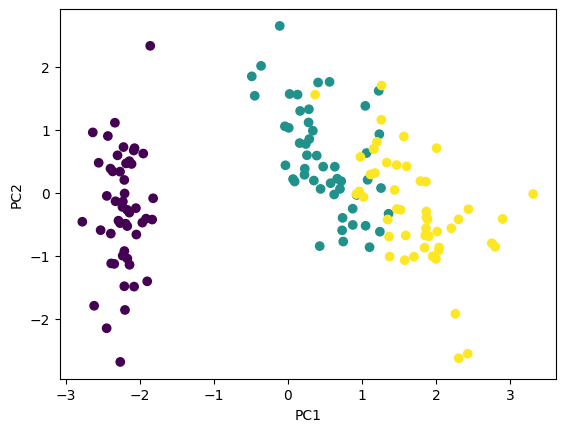

In [7]:
# plot transformed data
plt.scatter(X_new[:, 0], X_new[:, 1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


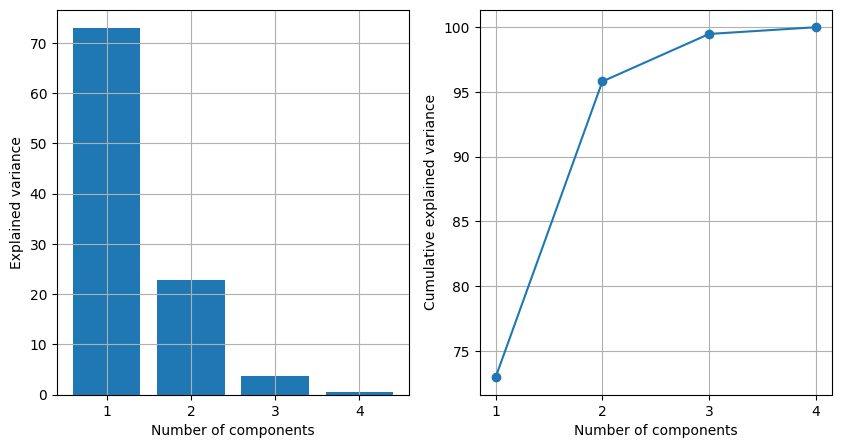

In [8]:
pca.plot_variance()

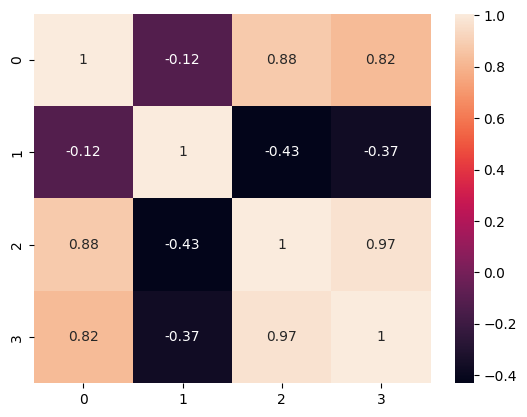

In [9]:
pca.plot_cov()

## Comparing with scikit-learn

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# standardize the data
scaled_features = StandardScaler().fit_transform(X)

In [12]:
pca2 = PCA()
X_new2 = pca2.fit_transform(scaled_features)

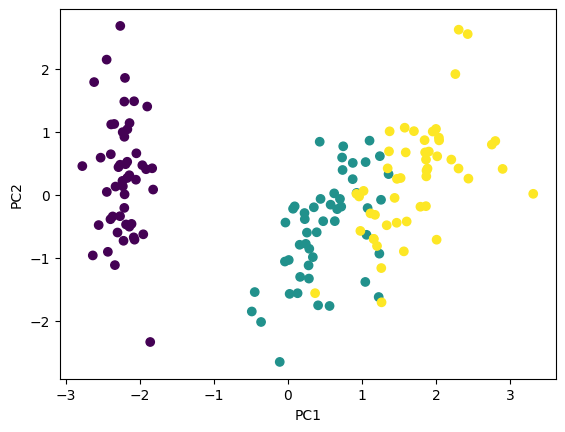

In [13]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Explained varience ratio =  [0.72962445 0.22850762 0.03668922 0.00517871]


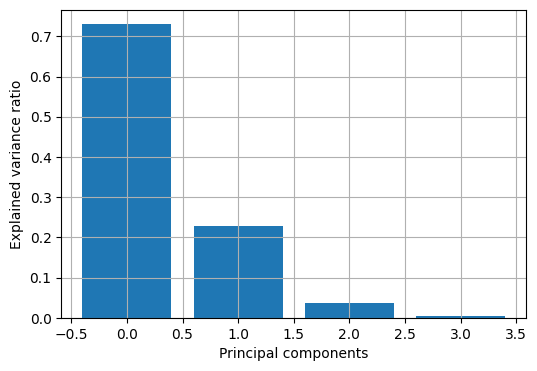

In [14]:
print('Explained varience ratio = ', pca2.explained_variance_ratio_)
plt.figure(figsize=(6, 4))
plt.bar(range(4), pca2.explained_variance_ratio_)
plt.grid(True)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

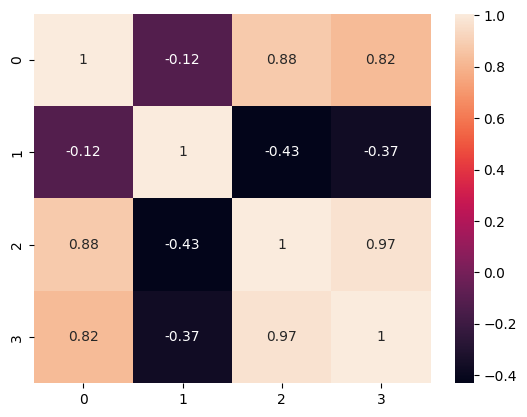

In [15]:
sns.heatmap(pca2.get_covariance(), annot=True)
plt.show()